In [2]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from matplotlib import pyplot as plt

Iteration:0,loss:0.5316144824028015
Iteration:100,loss:0.0008976426324807107
Iteration:200,loss:0.008508972823619843
Iteration:300,loss:0.003160942578688264
Iteration:400,loss:0.004491275176405907
Iteration:500,loss:0.0015163044445216656
Iteration:600,loss:0.000435273366747424
Iteration:700,loss:0.000944773550145328
Iteration:800,loss:0.0015190267004072666
Iteration:900,loss:0.0006331027252599597
Iteration:1000,loss:0.0009282852406613529
Iteration:1100,loss:0.0022567540872842073
Iteration:1200,loss:0.0005040136747993529
Iteration:1300,loss:0.00092263612896204
Iteration:1400,loss:0.0011204045731574297
Iteration:1500,loss:0.000599859282374382
Iteration:1600,loss:0.0004466526152100414
Iteration:1700,loss:0.002745892619714141
Iteration:1800,loss:0.0012562954798340797
Iteration:1900,loss:0.0007136076455935836
Iteration:2000,loss:0.000858592742588371
Iteration:2100,loss:0.00037078381865285337
Iteration:2200,loss:0.0016893008723855019
Iteration:2300,loss:0.0006744908168911934
Iteration:2400,l

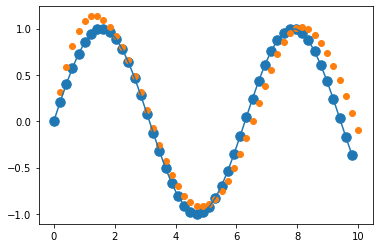

In [6]:
num_time_steps = 50
input_size = 1
hidden_size = 16
output_size = 1
lr = 0.01

class Net(nn.Module):
    
    def __init__(self,):
        super(Net,self).__init__()
        
        self.rnn  = nn.RNN(
            input_size=input_size,
            hidden_size=hidden_size,
            num_layers = 1,
            batch_first = True,
        )
        for p in self.rnn.parameters():
            nn.init.normal_(p,mean=0.0,std=0.001)
            
        self.linear  = nn.Linear(hidden_size,output_size)
        
    def forward(self,x,hidden_prev):
        
        out,hidden_prev = self.rnn(x,hidden_prev)
        
        out =  out.view(-1,hidden_size)
        out = self.linear(out)
        out = out.unsqueeze(dim = 0)
        return out,hidden_prev

model = Net()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(),lr)

hidden_prev = torch.zeros(1,1,hidden_size)

for iter in range(6000):
    start = np.random.randint(3,size=1)[0]
    time_steps = np.linspace(start,start + 10,num_time_steps)
    data = np.sin(time_steps)
    data = data.reshape(num_time_steps,1)
    x = torch.tensor(data[:-1]).float().view(1,num_time_steps - 1,1)
    y = torch.tensor(data[1:]).float().view(1,num_time_steps - 1,1)
    
    output,hidden_prev = model(x,hidden_prev)
    hidden_prev = hidden_prev.detach()
    
    loss = criterion(output,y)
    model.zero_grad()
    loss.backward()
    
    optimizer.step()
    
    if iter % 100 == 0:
        print(f'Iteration:{iter},loss:{loss.item()}')
        
start = np.random.randint(3,size=1)[0]
time_steps = np.linspace(start,start + 10, num_time_steps)
data = np.sin(time_steps)
data = data.reshape(num_time_steps,1)
x = torch.tensor(data[:-1]).float().view(1,num_time_steps - 1,1)
y = torch.tensor(data[1:]).float().view(1,num_time_steps - 1,1)

predictions = []
input = x[:,0,:]
for _ in range(x.shape[1]):
    input = input.view(1,1,1)
    (pred,hidden_prev) = model(input,hidden_prev)
    input = pred
    predictions.append(pred.detach().numpy().ravel()[0])
    
x = x.data.numpy().ravel()
y = y.data.numpy()
plt.scatter(time_steps[:-1],x.ravel(),s=90)
plt.plot(time_steps[:-1],x.ravel())

plt.scatter(time_steps[1:],predictions)
plt.show()

In [7]:
import os 
import requests

In [8]:
url = 'https://ss0.bdstatic.com/70cFuHSh_Q1YnxGkpoWK1HF6hhy/it/u=112051651,2212020555&fm=26&gp=0.jpg'
root = 'E://as//'
path = root + url.split('/')[-1]
try:
    if not os.path.exists(root):
        os.mkdir(root)
    if not os.path.exists(path):
        r = requests.get(url)
        with open(path,'wb') as f:
            f.write(r.content)
            f.close()
            print('保存成功')
    else:
        print('已存在')
except:
    print('保存失败')

保存成功


In [9]:
x = torch.empty(5,3)
print(x)

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])


In [10]:
y = torch.rand(5,3)
print(y)

tensor([[0.4552, 0.5526, 0.6393],
        [0.2065, 0.1707, 0.3210],
        [0.1218, 0.4925, 0.7311],
        [0.7122, 0.7443, 0.1430],
        [0.9719, 0.5942, 0.0749]])


In [11]:
z = torch.empty(5,3,dtype = torch.long)
print(z)
c = torch.ones(5,3,dtype = torch.long)
print(c)

tensor([[   32370129135075429,    14074049488748636,    30399692624953390],
        [   32370017465139305,    12666807751278697,    30118247716159600],
        [   32370056120172641,    28147931469709404,    29273895800143977],
        [   26740552291713129,    32651586931064944, -9223361639951185936],
        [   25895968444448860,    18296268626985029,    31244147623002222]])
tensor([[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]])


In [13]:
a = torch.tensor([5.5,3])
print(a)

tensor([5.5000, 3.0000])


In [14]:
x = x.new_ones(5,3,dtype = torch.double)
print(x)
x = torch.ones_like(x)
x=torch.randn_like(x,dtype=torch.float)
print(x)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)
tensor([[-0.1962, -0.3407, -0.7768],
        [ 0.2140, -0.0698,  1.2518],
        [-0.3777,  0.4054, -0.6555],
        [-1.8381, -0.2838,  0.0297],
        [ 0.8980, -0.5440, -2.5065]])


In [15]:
print(x.size())

torch.Size([5, 3])


In [20]:
y = torch.rand(5,3)
print(x+y)
print(torch.add(x,y))
y.add_(x)
print(y)

tensor([[ 0.2643, -0.2602, -0.1819],
        [ 0.8345,  0.1115,  1.7868],
        [-0.1018,  1.0044, -0.2999],
        [-1.0594,  0.6608,  0.9061],
        [ 1.7263,  0.0940, -1.8352]])
tensor([[ 0.2643, -0.2602, -0.1819],
        [ 0.8345,  0.1115,  1.7868],
        [-0.1018,  1.0044, -0.2999],
        [-1.0594,  0.6608,  0.9061],
        [ 1.7263,  0.0940, -1.8352]])
tensor([[ 0.2643, -0.2602, -0.1819],
        [ 0.8345,  0.1115,  1.7868],
        [-0.1018,  1.0044, -0.2999],
        [-1.0594,  0.6608,  0.9061],
        [ 1.7263,  0.0940, -1.8352]])


In [22]:
print(x[:,1])

tensor([-0.3407, -0.0698,  0.4054, -0.2838, -0.5440])


In [23]:
x= torch.randn(4,4)
y = x.view(16)
z = x.view(-1,8)
print(x.size(),y.size(),z.size())

torch.Size([4, 4]) torch.Size([16]) torch.Size([2, 8])


In [24]:
x = torch.randn(1)
print(x)
print(x.item())

tensor([0.1161])
0.11611611396074295


In [25]:
device = torch.device('cpu')
x = torch.tensor([2.0,3.0]).to(device)
y = x.numpy()
print(x)
y[0] = 999
print(x)

tensor([2., 3.])
tensor([999.,   3.])


In [26]:
a = np.ones(5)
b =torch.from_numpy(a)
print(a)
b.add_(1)
print(a)

[1. 1. 1. 1. 1.]
[2. 2. 2. 2. 2.]


In [30]:
def f1(x):
    return x**2
def f2(x):
    return x**3

x = torch.tensor([1.0],requires_grad = True)
y1 = f1(x)
y1.backward()
print(x.grad)

tensor([2.])


In [31]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [32]:
class Net(nn.Module):
    
    def __init__(self):
        super(Net,self).__init__()
        self.conv1 = nn.Conv2d(1,6,3)
        self.conv2 = nn.Conv2d(6,16,3)
        self.fc1 = nn.Linear(16*6*6,120)
        self.fc2 = nn.Linear(120,84)
        self.fc3 = nn.Linear(84,10)
    def forward(self,x):
        x = F.max_pool2d(F.relu(self.conv1(x)),(2,2))
        x = F.max_pool2d(F.relu(self.conv2(x)),2)
        x = x.view(-1,self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    def num_flat_features(self,x):
        size = x.size()[1:]
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=576, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [33]:
import numpy

In [34]:
N,D_in,H,D_out = 64,1000,100,10
x = np.random.randn(N,D_in)
y = np.random.randn(N,D_out)
w1 = np.random.randn(D_in,H)
w2 = np.random.randn(H,D_out)
learning_rate= 1e-6
for t in range(500):
    h = x.dot(w1)
    h_relu = np.maximum(h,0)
    y_pred = h_relu.dot(w2)
    loss = np.square(y_pred - y).sum()
    print(t,loss)
    grad_y_pred = 2.0 * (y_pred - y)
    grad_w2 = h_relu.T.dot(grad_y_pred)
    grad_h_relu = grad_y_pred.dot(w2.T)
    grad_h =grad_h_relu.copy()
    grad_h[h<0] = 0
    grad_w1 = x.T.dot(grad_h)
    w1 -= learning_rate * grad_w1
    w2 -= learning_rate * grad_w2

0 31833553.089315355
1 29166720.867195867
2 28828018.91879974
3 26842457.951479353
4 21958849.51754202
5 15287947.80793837
6 9423471.314033158
7 5461207.328256165
8 3226536.7260980057
9 2040098.6833861019
10 1410843.626032944
11 1054825.3634570343
12 834930.4142362897
13 685519.1857605407
14 575799.1866070861
15 490756.47002173297
16 422516.4400636734
17 366308.51208832837
18 319292.32971839304
19 279601.4344227214
20 245787.19796858344
21 216772.8539282601
22 191768.53421198623
23 170134.09188096056
24 151332.0479642623
25 134945.5099238573
26 120633.83705399022
27 108073.01352895865
28 97014.83884276528
29 87261.67700873416
30 78643.65957482225
31 71002.06537545907
32 64216.58415990103
33 58172.36720260428
34 52778.7154773083
35 47958.20966816093
36 43638.92153744945
37 39762.08661449593
38 36277.094780622225
39 33139.14712804706
40 30313.999243476916
41 27765.125567528004
42 25458.014064929303
43 23367.596562104154
44 21472.08348545104
45 19749.0390637635
46 18186.435562813003
47 16

393 0.0007578367002983823
394 0.0007258615768641495
395 0.0006952429747865529
396 0.0006659302227878946
397 0.0006378416246819451
398 0.0006109418770722284
399 0.0005851811973868533
400 0.0005605099475151972
401 0.0005368862031265059
402 0.0005142567434845094
403 0.0004925859060499009
404 0.0004718316134569368
405 0.00045195340319985057
406 0.0004329145257509119
407 0.00041468316099539367
408 0.00039722312574069936
409 0.0003804992269966934
410 0.0003644852566023813
411 0.0003491435953235116
412 0.0003344486465570143
413 0.0003203731570417085
414 0.0003068933299402679
415 0.0002939834965514442
416 0.00028161689607882794
417 0.0002697718011900586
418 0.0002584289454450814
419 0.0002475665139552132
420 0.0002371580735241585
421 0.00022718862401331587
422 0.0002176411324943516
423 0.0002084958110017774
424 0.00019973583526853336
425 0.00019134471558087903
426 0.00018330592398839077
427 0.00017560615603563626
428 0.00016823057499846606
429 0.00016116619339097258
430 0.00015439937870065455


In [35]:
import torch

In [36]:
dtype = torch.float
device = torch.device('cpu')
N,D_in,H,D_out = 64,1000,100,10
x = torch.randn(N,D_in,device=device,dtype=dtype)
y = torch.randn(N,D_out,device=device,dtype=dtype)
w1 = torch.randn(D_in,H,device=device,dtype=dtype)
w2 = torch.randn(H,D_out,device = device,dtype=dtype)
learning_rate = 1e-6
for t in range(500):
    h =x.mm(w1)
    h_relu = h.clamp(min = 0)
    y_pred = h_relu.mm(w2)
    
    loss = (y_pred -y).pow(2).sum().item()
    if t % 100 ==99:
        print(t,loss)
        
    grad_y_pred = 2.0*(y_pred-y)
    grad_w2 = h_relu.t().mm(grad_y_pred)
    grad_h_relu = grad_y_pred.mm(w2.t())
    grad_h = grad_h_relu.clone()
    grad_h[h<0] = 0
    grad_w1 = x.t().mm(grad_h)
    w1 -= learning_rate * grad_w1
    w2 -= learning_rate * grad_w2

99 810.6602783203125
199 5.757543563842773
299 0.07683855295181274
399 0.0017152782529592514
499 0.00015988480299711227


In [39]:
import torch
dtype = torch.float
device = torch.device('cpu')
N,D_in,H,D_out = 64,1000,100,10
x = torch.randn(N,D_in,device=device,dtype=dtype)
y = torch.randn(N,D_out,device=device,dtype=dtype)
w1 = torch.randn(D_in,H,device=device,dtype=dtype,requires_grad=True)
w2 = torch.randn(H,D_out,device=device,dtype=dtype,requires_grad=True)
learning_rate = 1e-6
for t in range(500):
    y_pred = x.mm(w1).clamp(min=0).mm(w2)
    loss = (y_pred - y).pow(2).sum()
    if t % 100 == 99:
        print(t,loss.item())
    loss.backward()
    with torch.no_grad():
        w1 -= learning_rate * w1.grad
        w2 -= learning_rate * w2.grad
        w1.grad.zero_()
        w2.grad.zero_()

99 387.4195556640625
199 1.3092135190963745
299 0.00750186899676919
399 0.00018888391787186265
499 3.656704575405456e-05
